In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
df = pd.read_csv('output.csv')
df.head()

,bd,cd,bp,bm,cp,cm
0,0,0,311,310,0,0
1,0,1,235,224,9,9
2,0,2,237,226,20,20
3,0,3,220,209,31,31
4,0,4,174,167,42,42


In [3]:

vRawMax = 4096
vMax = 6*1.024
rBase =22e3
rColl = 220

def getVals(ix):
    bd = df.bd.values[ix]
    cd = df.cd.values[ix]
    bp = df.bp.values[ix]
    bm = df.bm.values[ix]
    cp = df.cp.values[ix]
    cm = df.cm.values[ix]
    return {'bd': bd, 'cd': cd, 'bp': bp, 'bm': bm, 'cp': cp, 'cm': cm}

def calcCurrents(ix):
    vals = getVals(ix)
    dvBase = vMax*(vals['bp'] - vals['bm'])/vRawMax
    iBase = dvBase/rBase
    vcd = vMax*vals['cp']/vRawMax
    vc = vMax*vals['cm']/vRawMax
    dvColl = vcd - vc
    iColl = dvColl/rColl
    return {'iBase': iBase, 'iColl': iColl, 'vc':vc}

currBD = df.bd.values[0]
currCD = df.cd.values[0]
results = {currBD: []}

for ix in range(len(df.bd.values)):
    newBD = df.bd.values[ix]
    if currBD == newBD:
        theList = results[currBD]
    else:
        currBD = newBD
        theList = []
        results[currBD] = theList
    theList.append(calcCurrents(ix))





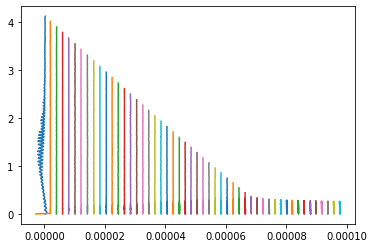

In [4]:
for bd in results.keys():
    plt.plot(list(map(lambda d: d['iBase'],results[bd])),list(map(lambda d: d['vc'],results[bd])), label=bd)

Text(0, 0.5, 'Collector current (mA)')

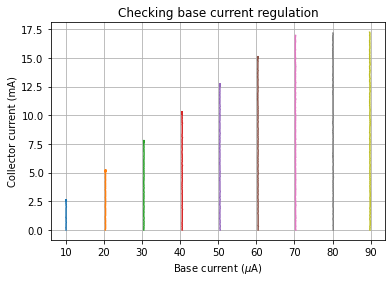

In [11]:
for bd in list(results.keys())[5::5]:
    plt.plot(list(map(lambda d: d['iBase']*1e6,results[bd])),list(map(lambda d: d['iColl']*1e3,results[bd])), label=bd)

plt.grid()
plt.title("Checking base current regulation")
plt.xlabel("Base current ($\mu$A)")
plt.ylabel("Collector current (mA)")

Text(0.5, 1.0, '2N3904 Collector Current vs Collector Voltage at various base currents')

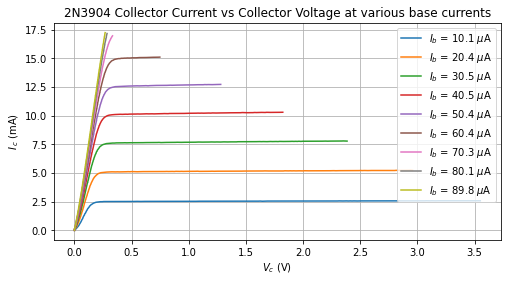

In [9]:
plt.figure(figsize=(8,4))
for bd in np.array(sorted(results.keys()))[5::5]:
    ibMean = np.array(list(map(lambda d: d['iBase'],results[bd]))).mean()
    plt.plot(list(map(lambda d: d['vc'],results[bd])),list(map(lambda d: d['iColl']*1000,results[bd])), label="$I_{b}$ = %.1f $\mu$A" % (ibMean*1e6))
plt.grid()
plt.legend()
plt.xlabel("$V_{c}$ (V)")
plt.ylabel("$I_{\,c}$ (mA)")
plt.title("2N3904 Collector Current vs Collector Voltage at various base currents")


In [1]:
data = {20: [(20, 140, 879, 580, 698, 1513), (20, 141, 880, 579, 709, 1525), (20, 142, 879, 579, 719, 1535), (20, 143, 880, 579, 730, 1546), (20, 144, 879, 579, 740, 1556), (20, 145, 880, 580, 751, 1567), (20, 146, 879, 579, 762, 1578), (20, 147, 880, 579, 772, 1589), (20, 148, 880, 580, 783, 1599), (20, 149, 880, 580, 794, 1611), (20, 150, 879, 579, 804, 1621), (20, 151, 880, 579, 815, 1632), (20, 152, 880, 579, 826, 1643), (20, 153, 880, 580, 837, 1654), (20, 154, 879, 580, 848, 1664), (20, 155, 880, 579, 858, 1676), (20, 156, 880, 579, 870, 1687), (20, 157, 880, 580, 880, 1698), (20, 158, 879, 580, 890, 1708), (20, 159, 880, 580, 901, 1718), (20, 160, 879, 580, 911, 1729), (20, 161, 880, 580, 922, 1740), (20, 162, 879, 580, 933, 1751), (20, 163, 880, 580, 944, 1762), (20, 164, 880, 580, 954, 1773), (20, 165, 880, 579, 965, 1784), (20, 166, 879, 579, 976, 1795), (20, 167, 880, 580, 987, 1805), (20, 168, 880, 580, 997, 1816), (20, 169, 880, 580, 1007, 1826), (20, 170, 880, 580, 1017, 1837), (20, 171, 880, 580, 1026, 1846), (20, 172, 880, 580, 1037, 1857), (20, 173, 880, 580, 1048, 1867), (20, 174, 881, 579, 1058, 1878), (20, 175, 880, 580, 1069, 1890), (20, 176, 880, 580, 1080, 1900), (20, 177, 880, 580, 1090, 1911), (20, 178, 880, 580, 1101, 1921), (20, 179, 880, 580, 1112, 1932), (20, 180, 880, 580, 1122, 1943), (20, 181, 880, 580, 1133, 1953), (20, 182, 881, 580, 1142, 1964), (20, 183, 880, 580, 1154, 1975), (20, 184, 880, 580, 1164, 1985), (20, 185, 880, 580, 1175, 1996), (20, 186, 880, 580, 1185, 2007), (20, 187, 880, 580, 1196, 2017), (20, 188, 880, 580, 1206, 2027), (20, 189, 880, 580, 1216, 2038), (20, 190, 880, 580, 1226, 2048), (20, 191, 880, 580, 1236, 2058), (20, 192, 880, 580, 1248, 2070), (20, 193, 880, 580, 1258, 2081), (20, 194, 880, 580, 1269, 2092), (20, 195, 880, 580, 1279, 2101), (20, 196, 880, 580, 1289, 2112), (20, 197, 880, 580, 1300, 2123), (20, 198, 880, 580, 1312, 2135), (20, 199, 880, 580, 1322, 2145), (20, 200, 880, 580, 1334, 2157), (20, 201, 880, 580, 1343, 2167), (20, 202, 880, 580, 1355, 2177), (20, 203, 880, 580, 1364, 2187), (20, 204, 880, 580, 1374, 2198), (20, 205, 881, 580, 1385, 2208), (20, 206, 880, 580, 1395, 2219), (20, 207, 880, 580, 1406, 2230), (20, 208, 880, 580, 1417, 2241), (20, 209, 880, 580, 1426, 2250), (20, 210, 880, 580, 1437, 2261), (20, 211, 880, 580, 1448, 2273), (20, 212, 880, 580, 1459, 2283), (20, 213, 880, 580, 1470, 2294), (20, 214, 880, 580, 1480, 2305), (20, 215, 880, 580, 1492, 2317), (20, 216, 881, 580, 1502, 2327), (20, 217, 880, 580, 1513, 2337), (20, 218, 880, 580, 1523, 2348), (20, 219, 880, 580, 1532, 2358), (20, 220, 880, 580, 1543, 2369), (20, 221, 880, 580, 1553, 2378), (20, 222, 880, 580, 1563, 2389), (20, 223, 880, 580, 1574, 2399), (20, 224, 880, 580, 1585, 2410), (20, 225, 880, 580, 1595, 2421), (20, 226, 880, 580, 1605, 2431), (20, 227, 880, 581, 1614, 2441), (20, 228, 880, 580, 1626, 2452), (20, 229, 880, 580, 1636, 2463), (20, 230, 880, 580, 1647, 2474), (20, 231, 880, 580, 1657, 2484), (20, 232, 880, 580, 1668, 2495), (20, 233, 880, 580, 1678, 2505), (20, 234, 880, 580, 1688, 2515), (20, 235, 881, 580, 1697, 2525), (20, 236, 881, 580, 1708, 2535), (20, 237, 881, 580, 1718, 2545), (20, 238, 880, 580, 1729, 2557), (20, 239, 880, 580, 1740, 2567), (20, 240, 881, 580, 1750, 2577), (20, 241, 880, 581, 1761, 2588), (20, 242, 880, 580, 1771, 2599), (20, 243, 881, 580, 1782, 2609), (20, 244, 881, 581, 1792, 2620), (20, 245, 880, 581, 1801, 2629), (20, 246, 880, 580, 1812, 2640), (20, 247, 880, 580, 1822, 2650), (20, 248, 880, 580, 1833, 2662), (20, 249, 880, 581, 1844, 2672), (20, 250, 880, 580, 1854, 2683), (20, 251, 881, 581, 1864, 2693), (20, 252, 880, 581, 1874, 2704), (20, 253, 881, 581, 1885, 2714), (20, 254, 880, 581, 1896, 2725), (20, 255, 880, 581, 1906, 2736)]}

In [6]:
d = np.array(data[20])

In [23]:
d[:,5]

array([1513, 1525, 1535, 1546, 1556, 1567, 1578, 1589, 1599, 1611, 1621,
       1632, 1643, 1654, 1664, 1676, 1687, 1698, 1708, 1718, 1729, 1740,
       1751, 1762, 1773, 1784, 1795, 1805, 1816, 1826, 1837, 1846, 1857,
       1867, 1878, 1890, 1900, 1911, 1921, 1932, 1943, 1953, 1964, 1975,
       1985, 1996, 2007, 2017, 2027, 2038, 2048, 2058, 2070, 2081, 2092,
       2101, 2112, 2123, 2135, 2145, 2157, 2167, 2177, 2187, 2198, 2208,
       2219, 2230, 2241, 2250, 2261, 2273, 2283, 2294, 2305, 2317, 2327,
       2337, 2348, 2358, 2369, 2378, 2389, 2399, 2410, 2421, 2431, 2441,
       2452, 2463, 2474, 2484, 2495, 2505, 2515, 2525, 2535, 2545, 2557,
       2567, 2577, 2588, 2599, 2609, 2620, 2629, 2640, 2650, 2662, 2672,
       2683, 2693, 2704, 2714, 2725, 2736])